## Importing useful libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from sklearn.utils import resample
import seaborn as sns
%matplotlib inline
import xlsxwriter
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
# import libraries
from datetime import datetime, timedelta
import re
import copy
import missingno as msno
#import plotly.plotly as py
from mpl_toolkits.basemap import Basemap
import plotly.offline as pyoff
import plotly.graph_objs as go
#initiate plotly
pyoff.init_notebook_mode()

In [3]:
#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from mlxtend.evaluate import bias_variance_decomp
from sklearn.preprocessing import StandardScaler
# import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from mlxtend.evaluate import bias_variance_decomp

--------
# Predict House Prices with Machine Learning
https://towardsdatascience.com/predict-house-prices-with-machine-learning-5b475db4e1e

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error 
import pickle
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix,r2_score,roc_curve, roc_auc_score
from sklearn.utils import resample
from sklearn.model_selection import validation_curve, learning_curve, ShuffleSplit, KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.datasets import load_digits
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from mlxtend.evaluate import bias_variance_decomp
from sklearn.impute import SimpleImputer

In [5]:
import os

print("Path at terminal when executing this file")
print(os.getcwd() + "\n")

Path at terminal when executing this file
C:\Users\Admin\Documents\Outra



In [6]:
# to ignore Warning msgs:

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [7]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Data Preparation:

In [8]:
f0 = pd.read_csv('prop_events_for_test.csv',keep_default_na = True, encoding='latin-1')
f1 = pd.read_csv('property_for_test.csv',keep_default_na = True, encoding='latin-1')

In [9]:
print(f0.dtypes)
f0.head()

prop_id     int64
date       object
type       object
dtype: object


prop_id                      date      type
0   129114  2008-02-01T00:00:00.000Z    survey
1   129114  2010-11-26T00:00:00.000Z    survey
2   129114  2016-02-16T00:00:00.000Z      sale
3   129213  2013-12-20T00:00:00.000Z    survey
4   129451  2018-05-10T00:00:00.000Z  l_rented

In [10]:
f0.date = pd.to_datetime(f0.date,origin='unix')
print(max(f0.date), min(f0.date))
print(f0.dtypes)
f0.head()

2018-07-07 00:00:00+00:00 1995-01-06 00:00:00+00:00
prop_id                  int64
date       datetime64[ns, UTC]
type                    object
dtype: object


prop_id                      date      type
0   129114 2008-02-01 00:00:00+00:00    survey
1   129114 2010-11-26 00:00:00+00:00    survey
2   129114 2016-02-16 00:00:00+00:00      sale
3   129213 2013-12-20 00:00:00+00:00    survey
4   129451 2018-05-10 00:00:00+00:00  l_rented

In [11]:
def _change_type(x):
    if pd.isna(x["previous_type"]) is False:
        if x["type"] != x["previous_type"]:
            return "change from %s to %s" % (x["previous_type"], x["type"])
        else:
            return np.nan
   
    return np.nan

In [12]:
df0 = f0.sort_values(by=["prop_id", "date"], ascending=True)
df0["previous_type"] = df0.groupby(["prop_id"])["type"].shift(1)
df0["change_type"] = df0.apply(func=_change_type, axis=1).fillna("No_changes")
df0 = df0.sort_values(by=["date"], ascending=False).drop_duplicates(subset=['prop_id'])
df0 = df0.drop(['date', 'type', 'previous_type'], axis=1)

In [13]:
df00 = f0.sort_values('date').groupby('prop_id').tail(1)
df00 = df00.drop(['date'], axis=1)
df_0 = df0.merge(df00, left_on = 'prop_id', right_on = 'prop_id')
df_0.loc[df_0['change_type'] == "No_changes", 'change_type'] = df_0['type']
df_0 = df_0.drop(['type' ], axis = 1)
print(df_0.prop_id.nunique())

6514


In [14]:
df_0[(df_0.prop_id == 146912)]

prop_id change_type
7   146912      l_rent

In [15]:
f0[(f0.prop_id == 174515)].sort_values(by=["prop_id", "date"], ascending=True)

prop_id                      date        type
13953   174515 1998-04-03 00:00:00+00:00      survey
13954   174515 2016-02-01 00:00:00+00:00        sale
13955   174515 2018-01-26 00:00:00+00:00  l_for_sale
13956   174515 2018-02-08 00:00:00+00:00      l_sold

In [16]:
df_0[(df_0.prop_id == 174515)]

prop_id                       change_type
400   174515  change from l_for_sale to l_sold

In [17]:
print(f0.shape)
print("prop_id: " + str(f0.prop_id.nunique()))
print("-----\n Count Unique Type: " + str(f0.type.value_counts()))

print(df_0.shape)
print("prop_id: " + str(df_0.prop_id.nunique()))

(18922, 3)
prop_id: 6514
-----
 Count Unique Type: survey                13063
sale                   1641
l_rent                 1408
l_rented                968
l_for_sale              885
l_sold                  767
l_sale_under_offer      115
l_rent_under_offer       75
Name: type, dtype: int64
(6514, 2)
prop_id: 6514


In [18]:
df_0['rent_flag'] = df_0['change_type'].str.contains(pat = 'rent')
df_0['flag'] = df_0['rent_flag'].astype(int) # rent = 1 & not = 0
df_0 = df_0.drop('rent_flag', axis = 1)
df_0.head()

prop_id                                   change_type  flag
0   137678                change from l_rented to l_sold     1
1   299327              change from l_for_sale to l_sold     0
2   174522  change from l_for_sale to l_sale_under_offer     0
3   132413              change from l_for_sale to l_sold     0
4   153597              change from l_for_sale to l_sold     0

In [19]:
f0[(f0.prop_id == 146912)]

prop_id                      date    type
3869   146912 1999-09-27 00:00:00+00:00  survey
3870   146912 2017-02-16 00:00:00+00:00  l_rent
3871   146912 2018-07-06 00:00:00+00:00  l_rent

In [20]:
df0[(df0.prop_id == 146912)]

prop_id change_type
3871   146912  No_changes

In [21]:
df_0[(df_0.prop_id == 146912)]

prop_id change_type  flag
7   146912      l_rent     1

In [22]:
print("flag: " + str(df_0.flag.nunique()))
print("-----\n Count Unique flag: " + str(df_0.flag.value_counts()))

flag: 2
-----
 Count Unique flag: 0    5521
1     993
Name: flag, dtype: int64


In [23]:
f1.shape

(15101, 35)

In [222]:
df_all = f1.merge(df_0, on='prop_id', how='left')
df = copy.deepcopy(df_all) 
print(df.shape)
df.head()

(15101, 37)


prop_id  x_coordinate  y_coordinate post_town postcode_sector  bathrooms  \
0   147676      357605.0      175370.0   BRISTOL           BS6 7        1.0   
1   152958      359244.0      175113.0   BRISTOL           BS6 5        1.0   
2   154711      357885.0      174968.0   BRISTOL           BS6 6        1.0   
3   155062      358435.0      174998.0   BRISTOL           BS6 7        1.0   
4   158773      359518.0      174770.0   BRISTOL           BS6 5        1.0   

   bathrooms$confidence  bathrooms$is_modelled  bedrooms  bedrooms$confidence  \
0              0.690607                   True       2.0             0.597546   
1              0.669888                   True       2.0             0.545742   
2              0.755115                   True       1.0             0.441697   
3              0.437527                   True       1.0             0.303969   
4              0.601943                   True       2.0             0.425108   

   bedrooms$is_modelled  floor_area  floor_area$confidence  \
0                  True        75.0               0.268520   
1                  True        77.0               0.498164   
2                  True        52.0               0.501172   
3                  True       172.0               0.444716   
4                  True        87.0               0.480993   

   floor_area$is_modelled  year_built  year_built$confidence  \
0                    True      1926.0               0.974469   
1                    True      1932.0               0.974275   
2                    True      1925.0               0.969434   
3                    True      1933.0               0.969446   
4                    True      1969.0               0.969883   

   year_built$is_modelled    property_type  property_type$confidence  \
0                    True  Flat/Maisonette                  0.966385   
1                    True  Flat/Maisonette                  0.980929   
2                    True  Flat/Maisonette                  0.985670   
3                    True  Flat/Maisonette                  0.978077   
4                    True  Flat/Maisonette                  0.875255   

   property_type$is_modelled property_style  property_style$confidence  \
0                       True       Terraced                   0.319002   
1                       True       Terraced                   0.327816   
2                       True      Converted                   0.378411   
3                       True  Semi-Detached                   0.657277   
4                       True       Detached                   0.583908   

   property_style$is_modelled ht_property_type  ht_property_type$confidence  \
0                        True  Flat/Maisonette                     0.579901   
1                        True  Flat/Maisonette                     0.763958   
2                        True  Flat/Maisonette                     0.854654   
3                        True  Flat/Maisonette                     0.658884   
4                        True         Detached                     0.507393   

   ht_property_type$is_modelled     tenure  tenure$confidence  \
0                          True  Leasehold           0.727775   
1                          True  Leasehold           0.880897   
2                          True  Leasehold           0.947736   
3                          True   Freehold           0.778489   
4                          True   Freehold           0.596687   

   tenure$is_modelled  property_value  property_value$confidence  \
0                True       378103.60                   0.800291   
1                True       377139.25                   0.661276   
2                True       322239.60                   0.841244   
3                True       367524.94                   0.602055   
4                True       313844.66                   0.867529   

   property_value$is_modelled  property_rental_value  \
0                        True              4364.6704   
1                 

<AxesSubplot:>

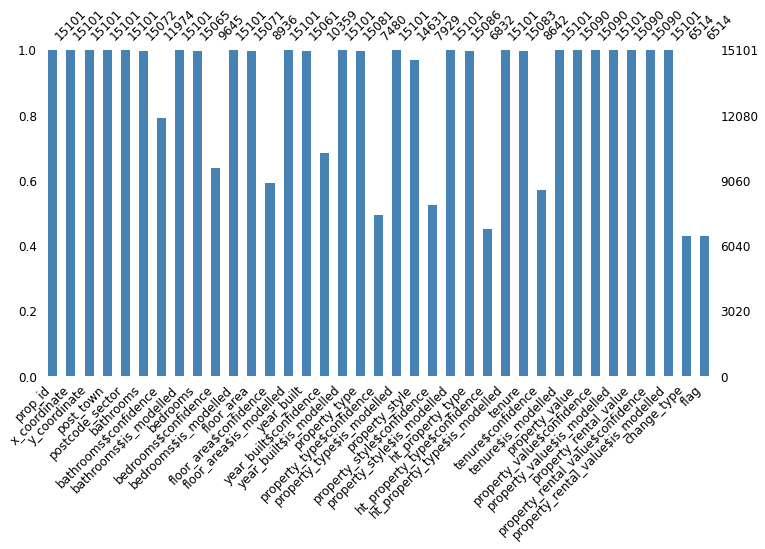

In [25]:
msno.bar(df, figsize=(12, 6), fontsize=12, color='steelblue')

## Dealing With Class Imbalance

In [26]:
df_f = f1.merge(df_0, left_on = 'prop_id', right_on = 'prop_id')
print(df_f.shape)
print("flag: " + str(df_f.flag.nunique()))
print("-----\n Count Unique flag: " + str(df_f.flag.value_counts()))

(6514, 37)
flag: 2
-----
 Count Unique flag: 0    5521
1     993
Name: flag, dtype: int64


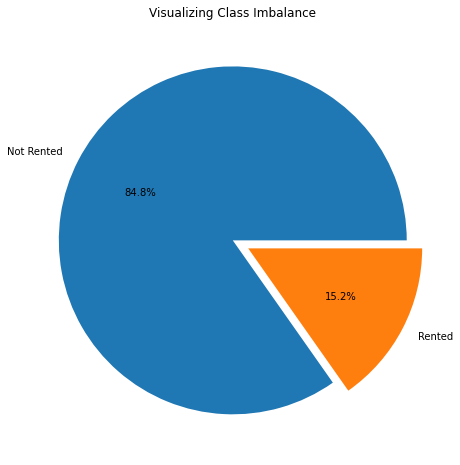

In [27]:
y = df_f.flag
plt.figure(figsize=(8,8))
plt.pie(y.value_counts().values,autopct="%.1f%%",
       explode=[0,0.1],labels=["Not Rented","Rented"],
       )
plt.title("Visualizing Class Imbalance")
plt.show()

In [28]:
#df1.loc[(df1['property_value$confidence'] >= 0.5 ) | (df1["property_value$is_modelled"] == "False")  & (df1['property_rental_value$is_modelled'] == "False" ), 'Rent'] = 'No'  
#df1.loc[(df1['property_rental_value$is_modelled'] == "True" ) | (df1['property_rental_value$confidence'] >= 0.5 ), 'Rent'] = 'Yes'  

In [29]:
# Separate majority and minority classes
df_majority = df_f[df_f["flag"]== 0]
df_minority = df_f[df_f["flag"]== 1]

# Get majority class (1)
L = df_f["flag"].loc[df_f['flag'] == 0].value_counts()

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples= L.iloc[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled["flag"].value_counts()

0    5521
1    5521
Name: flag, dtype: int64

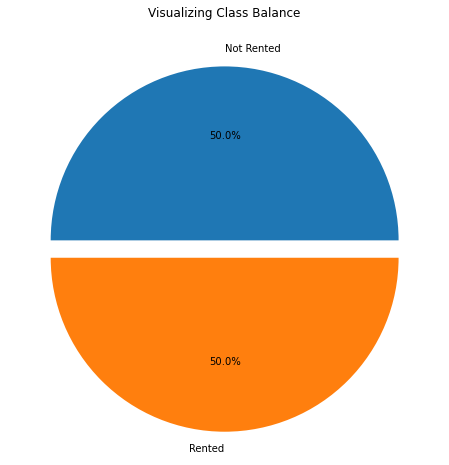

In [30]:
y = df_upsampled.flag
plt.figure(figsize=(8,8))
plt.pie(y.value_counts().values,autopct="%.1f%%",
       explode=[0,0.1],labels=["Not Rented","Rented"],
       )
plt.title("Visualizing Class Balance")
plt.show()

## Dealing With Missing Data:

<AxesSubplot:>

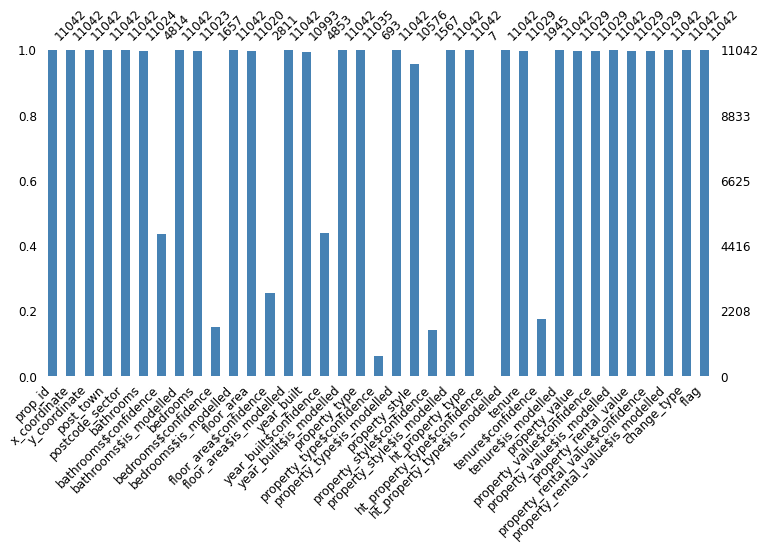

In [31]:
msno.bar(df_upsampled, figsize=(12, 6), fontsize=12, color='steelblue')

In [32]:
null_columns = (df_upsampled.isnull().sum(axis = 0)/len(df_upsampled)).sort_values(ascending=False).index
null_data = pd.concat([
    df_upsampled.isnull().sum(axis = 0),
    (round(100*(df_upsampled.isnull().sum(axis = 0)/len(df_upsampled)),2).sort_values(ascending=False)),
    df_upsampled.loc[:, df_upsampled.columns.isin(list(null_columns))].dtypes], axis=1)
null_data.head(50)

0      1        2
prop_id                                0   0.00    int64
x_coordinate                           0   0.00  float64
y_coordinate                           0   0.00  float64
post_town                              0   0.00   object
postcode_sector                        0   0.00   object
bathrooms                             18   0.16  float64
bathrooms$confidence                6228  56.40  float64
bathrooms$is_modelled                  0   0.00     bool
bedrooms                              19   0.17  float64
bedrooms$confidence                 9385  84.99  float64
bedrooms$is_modelled                   0   0.00     bool
floor_area                            22   0.20  float64
floor_area$confidence               8231  74.54  float64
floor_area$is_modelled                 0   0.00     bool
year_built                            49   0.44  float64
year_built$confidence               6189  56.05  float64
year_built$is_modelled                 0   0.00     bool
property_type                          7   0.06   object
property_type$confidence           10349  93.72  float64
property_type$is_modelled              0   0.00     bool
property_style                       466   4.22   object
property_style$confidence           9475  85.81  float64
property_style$is_modelled             0   0.00     bool
ht_property_type                       0   0.00   object
ht_property_type$confidence        11035  99.94  float64
ht_property_type$is_modelled           0   0.00     bool
tenure                                13   0.12   object
tenure$confidence                   9097  82.39  float64
tenure$is_modelled                     0   0.00     bool
property_value                        13   0.12  float64
property_value$confidence             13   0.12  float64
property_value$is_modelled             0   0.00     bool
property_rental_value                 13   0.12  float64
property_rental_value$confidence      13   0.12  float64
property_rental_value$is_modelled      0   0.00     bool
change_type                            0   0.00   object
flag                                   0   0.00    int32

## Delete columns containing either 50% or more than 50% NaN Values

In [33]:
perc = 50.0
min_count =  int(((100-perc)/100)*df_upsampled.shape[0] + 1)
df_f1 = df_upsampled.dropna( axis=1, 
                thresh=min_count)
print('befor: ' + str(df_f.shape))
print('after: ' + str(df_f1.shape))


df_f1[['property_type', 'property_style', 'tenure']] = df_f1[['property_type', 'property_style', 'tenure']].fillna(df_f1[['property_type', 'property_style', 'tenure']].mode().iloc[0])
df_f1[['bathrooms', 'bedrooms', 'year_built']] = df_f1[['bathrooms', 'bedrooms', 'year_built']].fillna( df_f1[['bathrooms', 'bedrooms', 'year_built']].median()) 


for col in ('floor_area', 'property_value', 'property_value$confidence',
                         'property_rental_value', 'property_rental_value$confidence'):
    df_f1[col] = df_f1[col].fillna(df_f1[col].mean())
    

print(df_f1.isnull().sum())

befor: (6514, 37)
after: (11042, 29)
prop_id                              0
x_coordinate                         0
y_coordinate                         0
post_town                            0
postcode_sector                      0
bathrooms                            0
bathrooms$is_modelled                0
bedrooms                             0
bedrooms$is_modelled                 0
floor_area                           0
floor_area$is_modelled               0
year_built                           0
year_built$is_modelled               0
property_type                        0
property_type$is_modelled            0
property_style                       0
property_style$is_modelled           0
ht_property_type                     0
ht_property_type$is_modelled         0
tenure                               0
tenure$is_modelled                   0
property_value                       0
property_value$confidence            0
property_value$is_modelled           0
property_rental_value      

<AxesSubplot:>

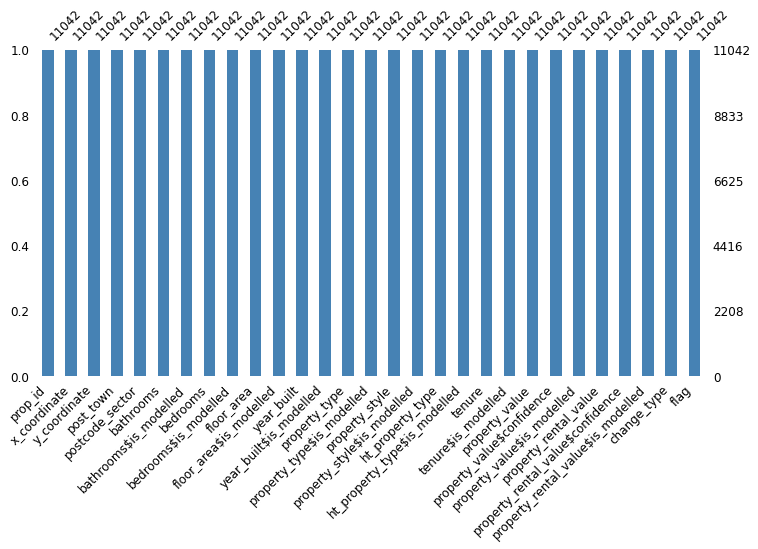

In [34]:
msno.bar(df_f1, figsize=(12, 6), fontsize=12, color='steelblue')

In [35]:
df_f1.describe()

prop_id   x_coordinate   y_coordinate     bathrooms  \
count   11042.000000   11042.000000   11042.000000  11042.000000   
mean   214659.407173  358495.842659  174856.497203      1.363159   
std     98663.607233     662.812284     582.607835      0.584320   
min    129114.000000  357361.000000  173719.000000      1.000000   
25%    154064.250000  357956.000000  174422.250000      1.000000   
50%    163060.000000  358365.000000  174726.270000      1.000000   
75%    281049.750000  359067.000000  175161.000000      2.000000   
max    462435.000000  360004.000000  176634.000000      7.000000   

           bedrooms    floor_area    year_built  property_value  \
count  11042.000000  11042.000000  11042.000000    1.104200e+04   
mean       3.052527    131.253902   1919.433527    5.246436e+05   
std        1.674098     67.248354     49.456634    2.451841e+05   
min        0.000000     26.000000   1300.000000    1.053810e+05   
25%        2.000000     80.000000   1891.000000    3.221200e+05   
50%        3.000000    116.000000   1901.000000    4.682575e+05   
75%        4.000000    166.000000   1950.000000    6.758480e+05   
max       10.000000    610.000000   2018.000000    1.943660e+06   

       property_value$confidence  property_rental_value  \
count               11042.000000           11042.000000   
mean                    0.868131            1558.824173   
std                     0.060705             610.562257   
min                     0.593695             513.984000   
25%                     0.850480            1093.405000   
50%                     0.884000            1445.580000   
75%                     0.907000            1918.000000   
max                     0.960000            8265.567000   

       property_rental_value$confidence          flag  
count                      11042.000000  11042.000000  
mean                           0.829663      0.500000  
std                            0.127336      0.500023  
min                            0.000000      0.000000  
25%                            0.777520      0.000000  
50%                            0.879480      0.500000  
75%                            0.917480      1.000000  
max                            0.956000      1.000000

In [ ]:
# Drop dataframe columns with only one distinct value:
for col in df_f1.columns:
    if len(df_f1[col].unique()) == 1:
        df_f1[col] = df_f1.drop(col,inplace=True,axis=1)

## Distribution:

array([[<AxesSubplot:title={'center':'prop_id'}>,
        <AxesSubplot:title={'center':'x_coordinate'}>,
        <AxesSubplot:title={'center':'y_coordinate'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'floor_area'}>],
       [<AxesSubplot:title={'center':'year_built'}>,
        <AxesSubplot:title={'center':'property_value'}>,
        <AxesSubplot:title={'center':'property_value$confidence'}>],
       [<AxesSubplot:title={'center':'property_rental_value'}>,
        <AxesSubplot:title={'center':'property_rental_value$confidence'}>,
        <AxesSubplot:title={'center':'flag'}>]], dtype=object)

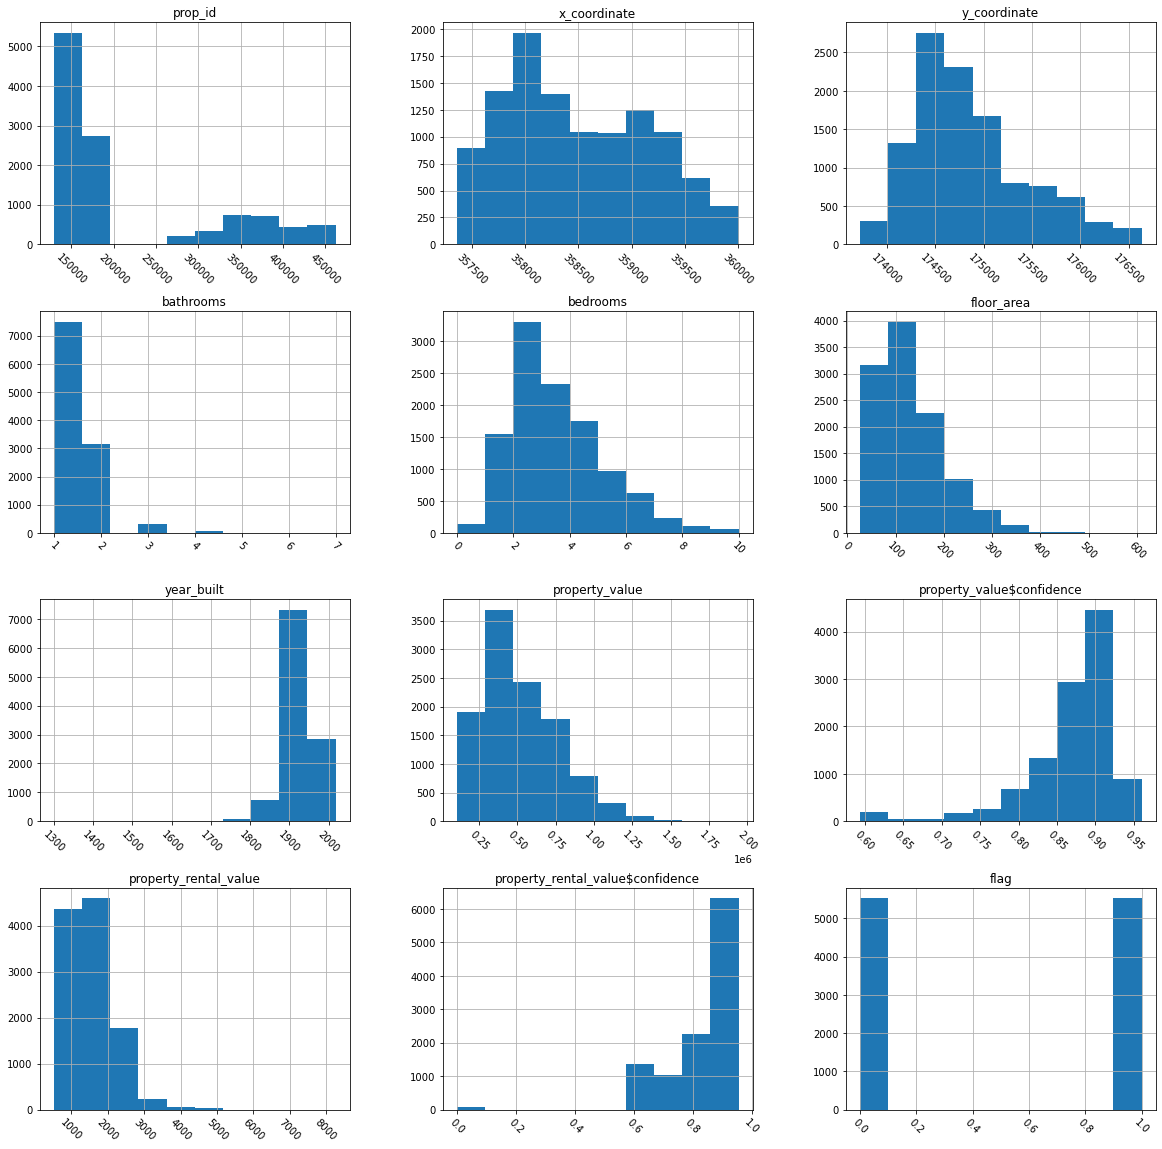

In [314]:
df_f1.hist(figsize=(20,20), xrot=-45)

Text(0.5, 1.0, 'Rent Distribution')

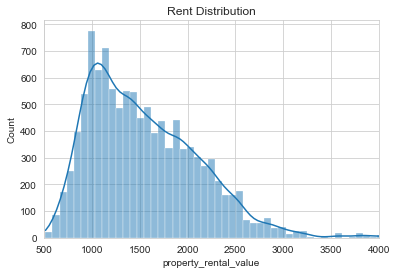

In [37]:
sns.set_style("whitegrid")

# Visualizing rent distribution
sns.histplot(x=df_f1["property_rental_value"],kde=True)
plt.xlim(500,4000)
plt.title("Rent Distribution")

Text(0.5, 1.0, 'Value Distribution')

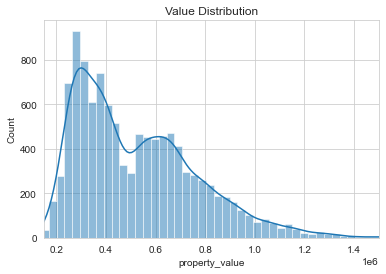

In [38]:
sns.set_style("whitegrid")

# Visualizing rent distribution
sns.histplot(x=df_f1["property_value"],kde=True)
plt.xlim(150000,1500000)
plt.title("Value Distribution")

<AxesSubplot:xlabel='property_value'>

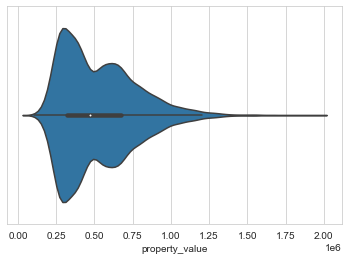

In [39]:
sns.violinplot(data=df_f1, x= 'property_value')

<AxesSubplot:xlabel='property_rental_value'>

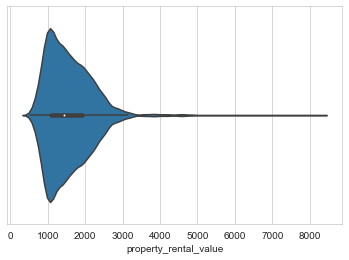

In [40]:
sns.violinplot(data=df_f1, x= 'property_rental_value')

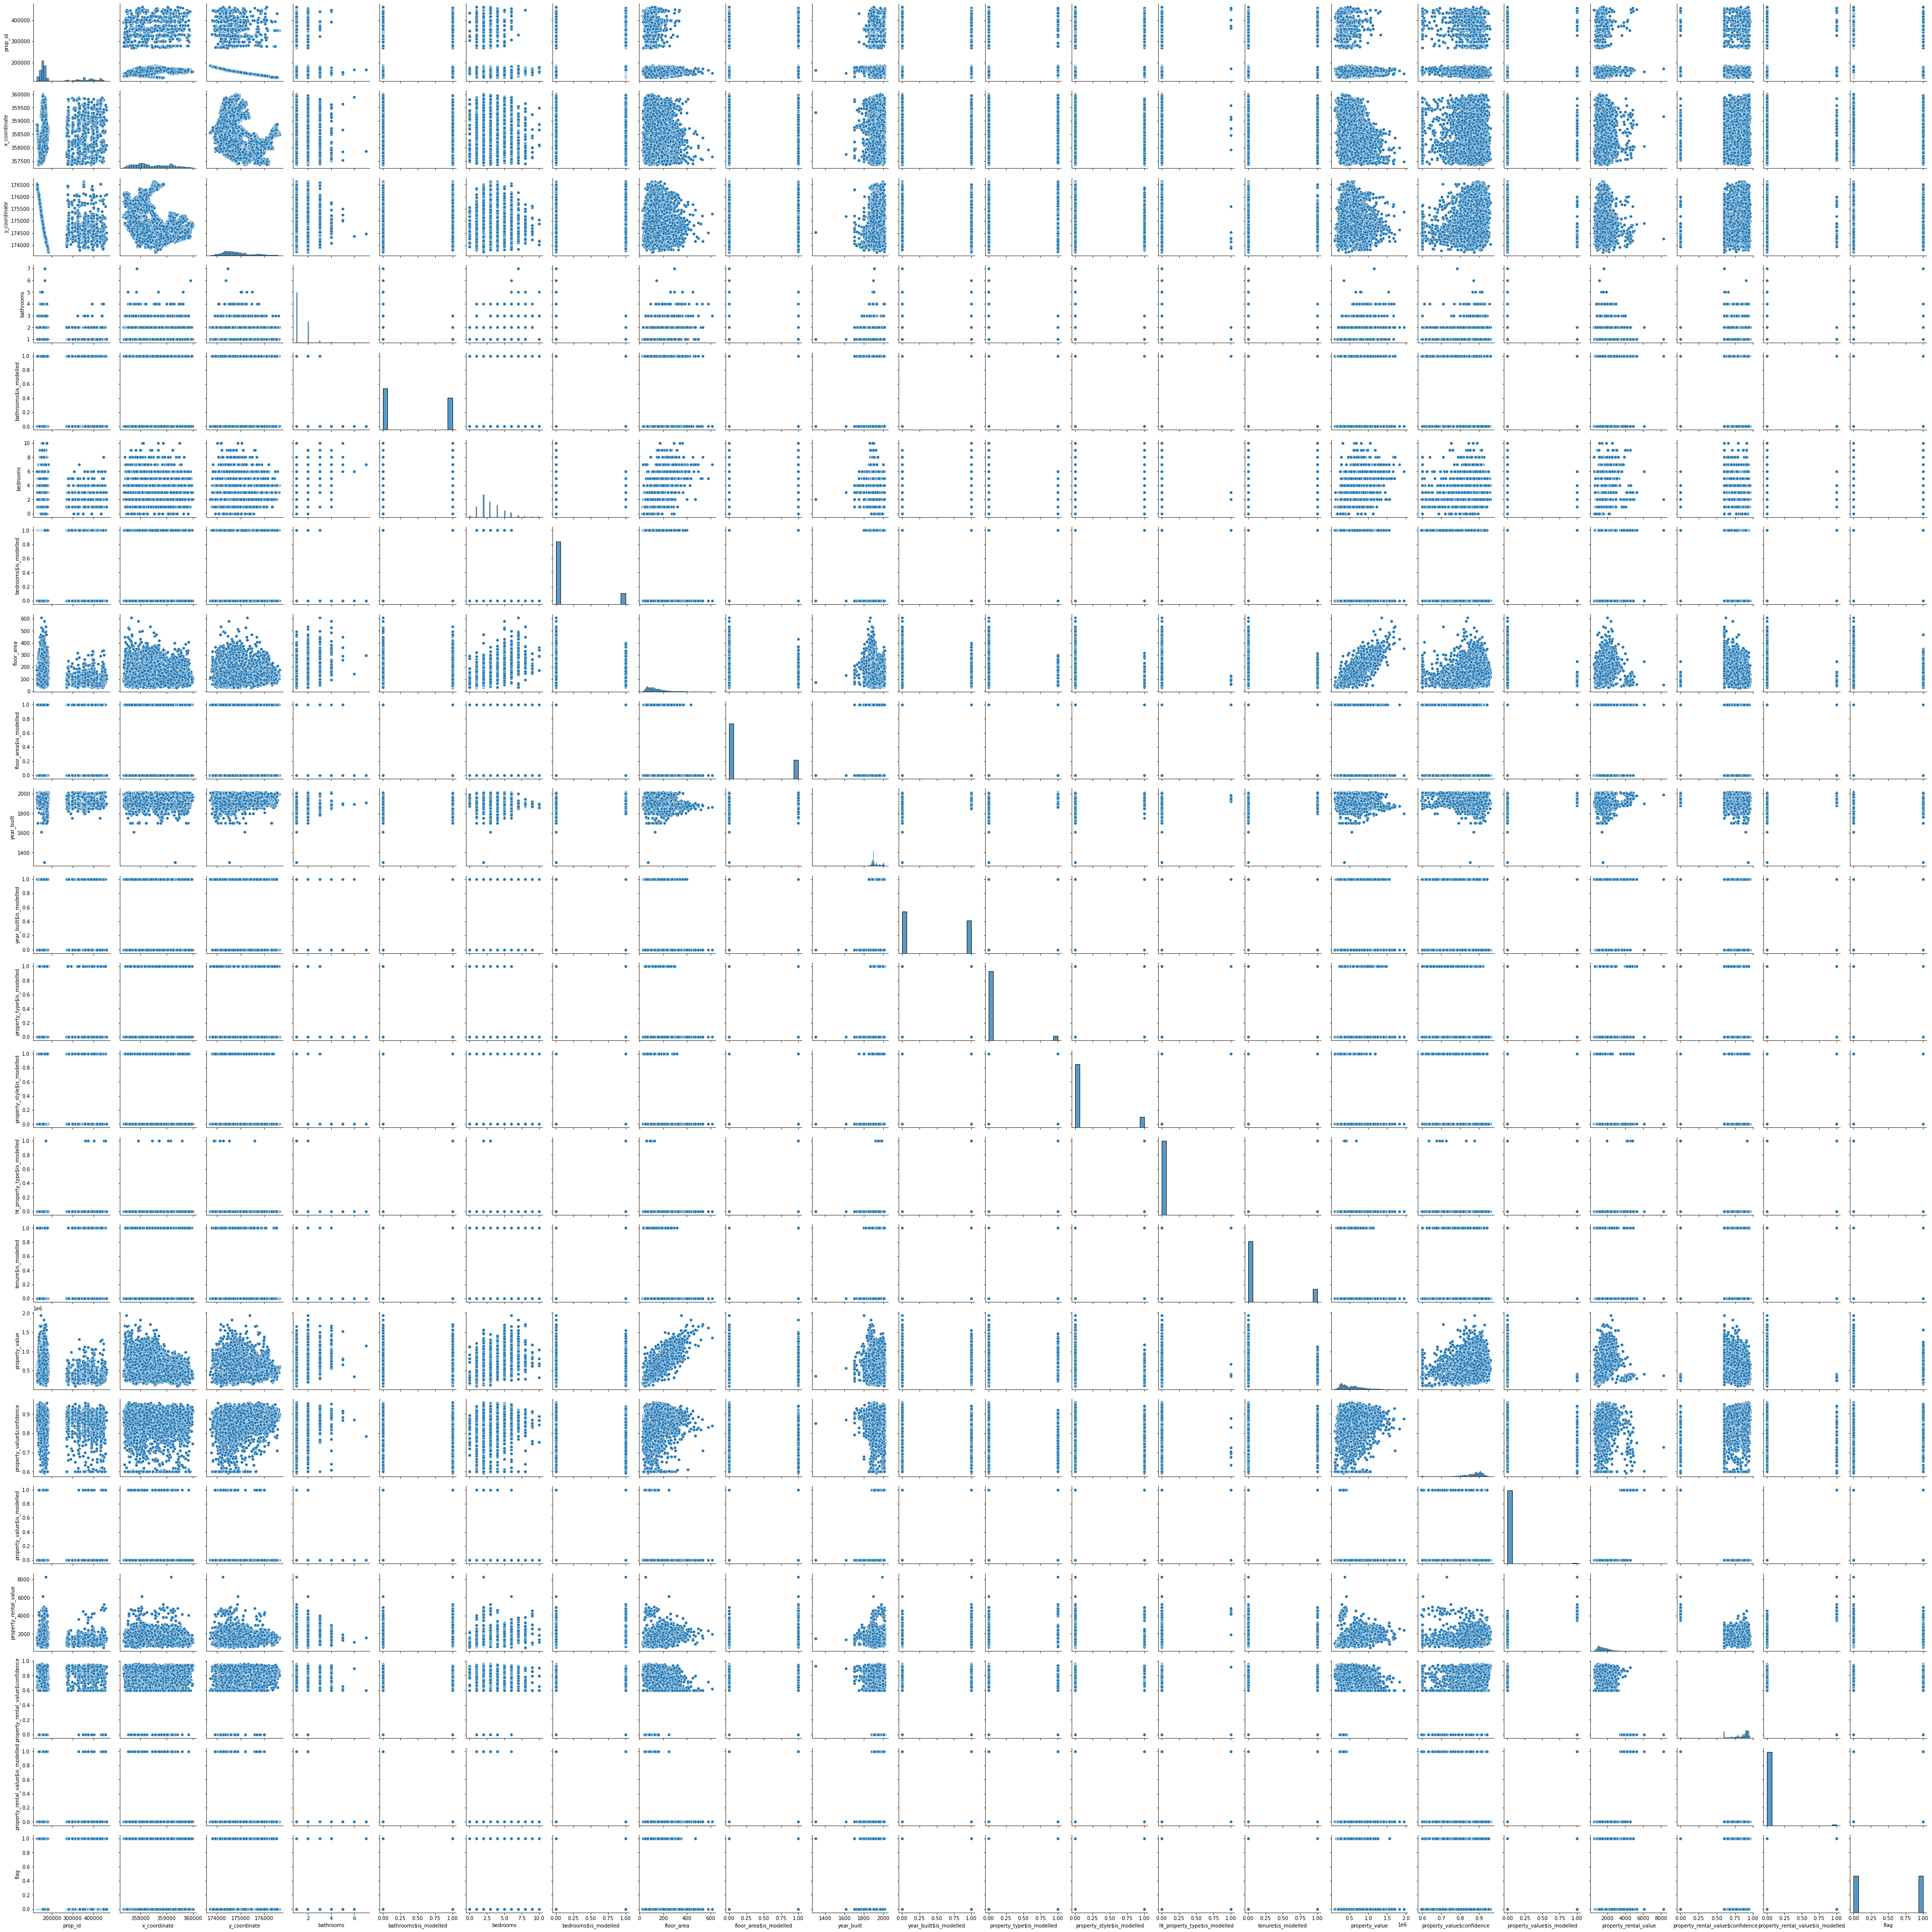

In [320]:
ax = sns.pairplot(df_f1)

## Analysis:

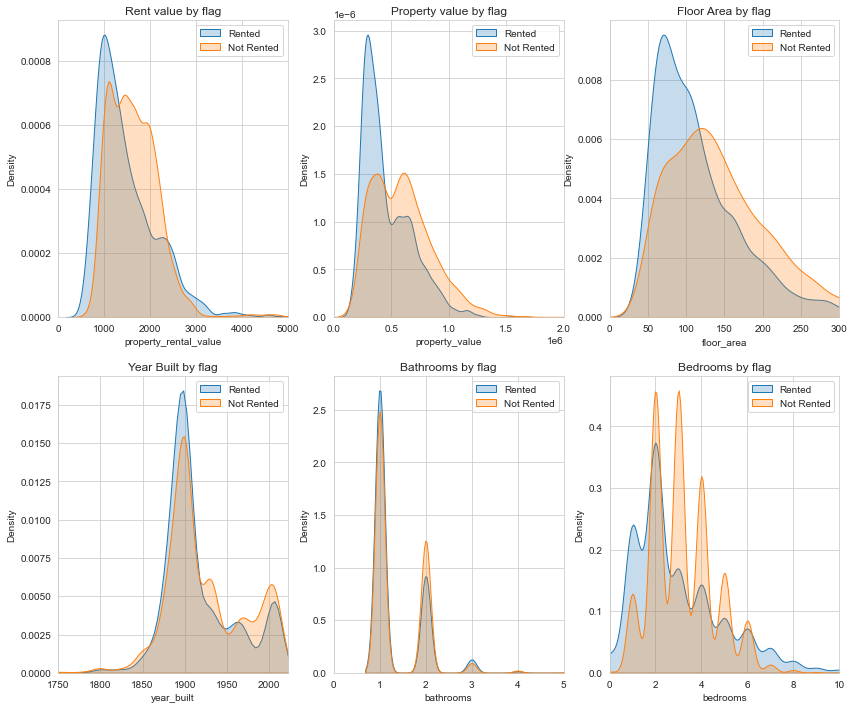

In [42]:
# Visualizing numeric feature distributions by location
plt.figure(figsize=(14,12))
plt.subplot(2,3,1)
sns.kdeplot(x=df_f1[df_f1["flag"] == 1]["property_rental_value"],shade=True,label="Rented")
sns.kdeplot(x=df_f1[df_f1["flag"] == 0]["property_rental_value"],shade=True,label="Not Rented")
plt.xlim(0,5000)
plt.title("Rent value by flag")
plt.legend()

plt.subplot(2,3,2)
sns.kdeplot(x=df_f1[df_f1["flag"] == 1]["property_value"],shade=True,label="Rented")
sns.kdeplot(x=df_f1[df_f1["flag"] == 0]["property_value"],shade=True,label="Not Rented")
plt.xlim(0,2000000)
plt.title("Property value by flag")
plt.legend()

plt.subplot(2,3,3)
sns.kdeplot(x=df_f1[df_f1["flag"] == 1]["floor_area"],shade=True,label="Rented")
sns.kdeplot(x=df_f1[df_f1["flag"] == 0]["floor_area"],shade=True,label="Not Rented")
plt.xlim(0,300)
plt.title("Floor Area by flag")
plt.legend()

plt.subplot(2,3,4)
sns.kdeplot(x=df_f1[df_f1["flag"] == 1]["year_built"],shade=True,label="Rented")
sns.kdeplot(x=df_f1[df_f1["flag"] == 0]["year_built"],shade=True,label="Not Rented")
plt.xlim(1750,2022)
plt.title("Year Built by flag")
plt.legend()

plt.subplot(2,3,5)
sns.kdeplot(x=df_f1[df_f1["flag"] == 1]["bathrooms"],shade=True,label="Rented")
sns.kdeplot(x=df_f1[df_f1["flag"] == 0]["bathrooms"],shade=True,label="Not Rented")
plt.xlim(0,5)
plt.title("Bathrooms by flag")
plt.legend()

plt.subplot(2,3,6)
sns.kdeplot(x=df_f1[df_f1["flag"] == 1]["bedrooms"],shade=True,label="Rented")
sns.kdeplot(x=df_f1[df_f1["flag"] == 0]["bedrooms"],shade=True,label="Not Rented")
plt.xlim(0,10)
plt.title("Bedrooms by flag")
plt.legend()


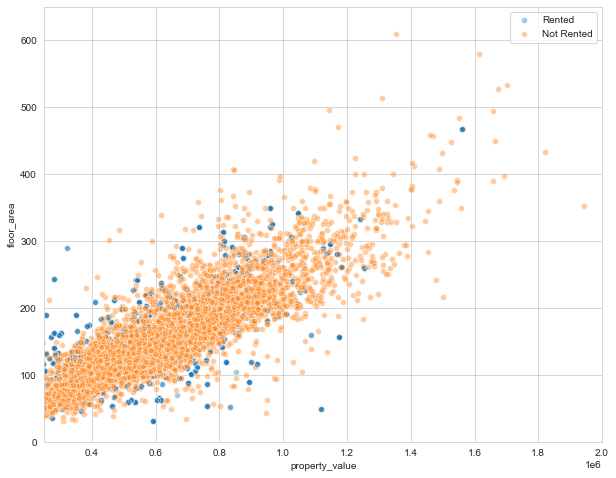

In [43]:
# Visualizing relationship between property value and floor area
plt.figure(figsize=(10,8))
plt.scatter(x="property_value",y="floor_area",alpha=0.4,
            edgecolors="white",data=df_f1[df_f1["flag"]==1],label="Rented")
plt.scatter(x="property_value",y="floor_area",alpha=0.4,
            edgecolors="white",data=df_f1[df_f1["flag"]==0],label="Not Rented")
plt.xlim(250000,2000000)
plt.ylim(0,650)
plt.xlabel("property_value")
plt.ylabel("floor_area")
plt.legend()

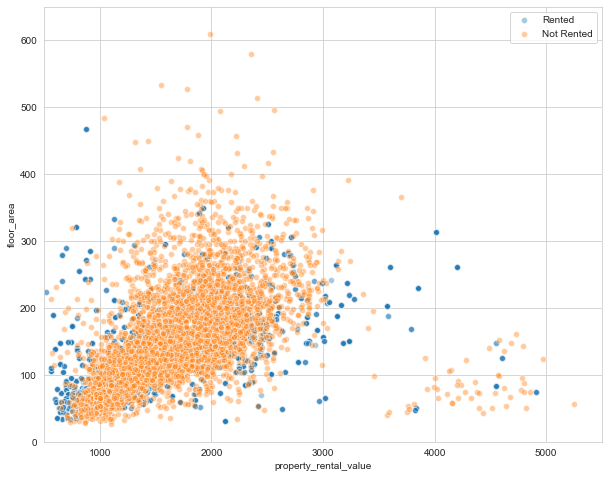

In [44]:
# Visualizing relationship between property value and floor area
plt.figure(figsize=(10,8))
plt.scatter(x="property_rental_value",y="floor_area",alpha=0.4,
            edgecolors="white",data=df_f1[df_f1["flag"]==1],label="Rented")
plt.scatter(x="property_rental_value",y="floor_area",alpha=0.4,
            edgecolors="white",data=df_f1[df_f1["flag"]==0],label="Not Rented")
plt.xlim(500,5500)
plt.ylim(0,650)
plt.xlabel("property_rental_value")
plt.ylabel("floor_area")
plt.legend()

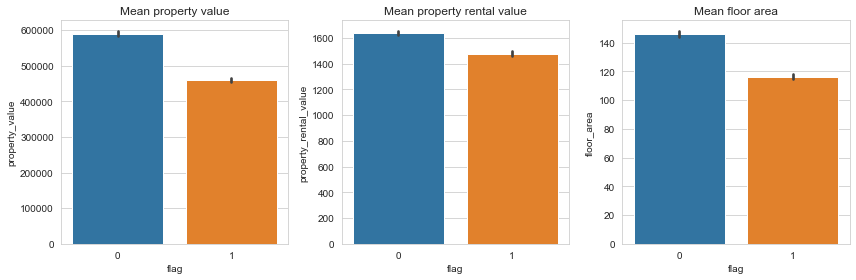

In [45]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.barplot(x="flag",y="property_value",data=df_f1)
plt.title("Mean property value")

plt.subplot(1,3,2)
sns.barplot(x="flag",y="property_rental_value",data=df_f1)
plt.title("Mean property rental value")

plt.subplot(1,3,3)
sns.barplot(x="flag",y="floor_area",data=df_f1)
plt.title("Mean floor area")

plt.tight_layout()

## Clean Up Classes:
* merge together sparse classes (those with too few observations)
* merge classes with similar meanings 
* fix up labelling errors 

In [46]:
df_f1.columns.to_series().groupby(df_f1.dtypes).groups

{bool: ['bathrooms$is_modelled', 'bedrooms$is_modelled', 'floor_area$is_modelled', 'year_built$is_modelled', 'property_type$is_modelled', 'property_style$is_modelled', 'ht_property_type$is_modelled', 'tenure$is_modelled', 'property_value$is_modelled', 'property_rental_value$is_modelled'], int32: ['flag'], int64: ['prop_id'], float64: ['x_coordinate', 'y_coordinate', 'bathrooms', 'bedrooms', 'floor_area', 'year_built', 'property_value', 'property_value$confidence', 'property_rental_value', 'property_rental_value$confidence'], object: ['postcode_sector', 'property_type', 'property_style', 'ht_property_type', 'tenure', 'change_type', 'post_town']}

In [47]:
print(df_f1.dtypes[df_f1.dtypes=='object'])
df_f1.flag.unique()

postcode_sector     object
property_type       object
property_style      object
ht_property_type    object
tenure              object
change_type         object
post_town           object
dtype: object


array([0, 1])

In [48]:
cols = df_f1[['postcode_sector', 'property_type', 'property_style', 'ht_property_type', 'tenure', 'change_type', 'post_town']]
for col in cols:
    print(df_f1[col].value_counts())
    print('\n----------')

BS6 6    4047
BS6 5    3812
BS6 7    3183
Name: postcode_sector, dtype: int64

----------
House              5873
Flat/Maisonette    5069
Bungalow/Chalet     100
Name: property_type, dtype: int64

----------
Semi-Detached    3658
Mid-Terrace      2591
Converted        1361
End-Terrace      1066
Detached          975
Terraced          930
Purpose Built     461
Name: property_style, dtype: int64

----------
Flat/Maisonette    4830
Terraced           3457
Semi-Detached      2263
Detached            479
All                  13
Name: ht_property_type, dtype: int64

----------
Freehold     6614
Leasehold    4368
Feudal         49
Shared         11
Name: tenure, dtype: int64

----------
survey                                          3874
change from l_rent to l_rented                  2003
l_rent                                          1119
change from survey to sale                       703
change from survey to l_rent                     638
l_rented                                      

In [49]:
df_f1.tenure = df_f1.tenure.replace(['Feudal','Shared'],'other')
df_f1 = df_f1.drop(['prop_id', 'post_town','change_type'], axis=1)
df_f1.tenure.value_counts()

Freehold     6614
Leasehold    4368
other          60
Name: tenure, dtype: int64

In [50]:
df_f1.head()

x_coordinate  y_coordinate postcode_sector  bathrooms  \
0      357923.0      175663.0           BS6 7        1.0   
1      359182.0      174475.0           BS6 5        1.0   
2      359231.0      174588.0           BS6 5        1.0   
4      358524.0      176377.0           BS6 7        1.0   
5      358632.0      176353.0           BS6 7        1.0   

   bathrooms$is_modelled  bedrooms  bedrooms$is_modelled  floor_area  \
0                   True       2.0                  True        79.0   
1                   True       2.0                  True        43.0   
2                   True       2.0                  True        45.0   
4                  False       5.0                 False       188.0   
5                   True       2.0                  True        72.0   

   floor_area$is_modelled  year_built  year_built$is_modelled  \
0                    True      1934.0                    True   
1                    True      1984.0                    True   
2                    True      2002.0                   False   
4                   False      1932.0                   False   
5                    True      1971.0                    True   

     property_type  property_type$is_modelled property_style  \
0  Flat/Maisonette                      False  Semi-Detached   
1  Flat/Maisonette                       True    End-Terrace   
2  Flat/Maisonette                      False       Terraced   
4            House                      False  Semi-Detached   
5  Flat/Maisonette                      False       Terraced   

   property_style$is_modelled ht_property_type  ht_property_type$is_modelled  \
0                        True  Flat/Maisonette                         False   
1                       False         Terraced                         False   
2                        True  Flat/Maisonette                         False   
4                       False    Semi-Detached                         False   
5                        True  Flat/Maisonette                         False   

      tenure  tenure$is_modelled  property_value  property_value$confidence  \
0  Leasehold               False       343499.22                   0.603378   
1   Freehold               False       340297.44                   0.799835   
2  Leasehold               False       256138.55                   0.935801   
4   Freehold               False       643846.00                   0.908480   
5  Leasehold               False       272926.00                   0.857480   

   property_value$is_modelled  property_rental_value  \
0                        True              3927.1620   
1                        True              4437.3580   
2                        True              3749.2751   
4                       False              1999.0000   
5                       False               913.3550   

   property_rental_value$confidence  property_rental_value$is_modelled  flag  
0                           0.00000                               True     0  
1                           0.00000                               True     0  
2                           0.00000                               True     0  
4                           0.74340                              False     0  
5                           0.92144                              False     0

## OneHot Encoder:

In [51]:
object_cols = df_f1.select_dtypes(include=['object']).columns
low_cardinality_cols = [col for col in object_cols if df_f1[col].nunique() < 15]
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

In [52]:
#df_1 = df_f1.change_type.drop(index =1)

In [53]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) # Cannot use drop='first' with handle_unknown
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_f1[low_cardinality_cols]))
#OH_cols_valid = pd.DataFrame(OH_encoder.transform(imputed_df_t[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = df_f1.index
#OH_cols_valid.index = imputed_df_t.index

# One-hot encoding removed columns' names; put it back
OH_cols.columns = OH_encoder.get_feature_names(low_cardinality_cols)
#OH_cols_valid.columns = OH_encoder.get_feature_names(low_cardinality_cols)

# Remove categorical columns (will replace with one-hot encoding)
num_X = df_f1.drop(object_cols, axis=1)
#num_X_valid = imputed_df_t.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols], axis=1)
#OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

#print(OH_encoder.categories_)
#print(OH_X_train.columns)
#print(OH_X_valid.columns)

In [54]:
#low_cardinality_cols = transformed.select_dtypes(include=['object']).columns
for object_col in OH_X:
    OH_X[object_col] = OH_X[object_col].astype(float, errors = 'raise')

In [55]:
Cols = OH_X.columns
for col in OH_X:
    print(col, OH_X[col].nunique())

x_coordinate 2467
y_coordinate 2362
bathrooms 7
bathrooms$is_modelled 2
bedrooms 11
bedrooms$is_modelled 2
floor_area 368
floor_area$is_modelled 2
year_built 204
year_built$is_modelled 2
property_type$is_modelled 2
property_style$is_modelled 2
ht_property_type$is_modelled 2
tenure$is_modelled 2
property_value 6481
property_value$confidence 416
property_value$is_modelled 2
property_rental_value 4272
property_rental_value$confidence 336
property_rental_value$is_modelled 2
flag 2
postcode_sector_BS6 5 2
postcode_sector_BS6 6 2
postcode_sector_BS6 7 2
property_type_Bungalow/Chalet 2
property_type_Flat/Maisonette 2
property_type_House 2
property_style_Converted 2
property_style_Detached 2
property_style_End-Terrace 2
property_style_Mid-Terrace 2
property_style_Purpose Built 2
property_style_Semi-Detached 2
property_style_Terraced 2
ht_property_type_All 2
ht_property_type_Detached 2
ht_property_type_Flat/Maisonette 2
ht_property_type_Semi-Detached 2
ht_property_type_Terraced 2
tenure_Freehol

## Correlation Heatmap:

<AxesSubplot:>

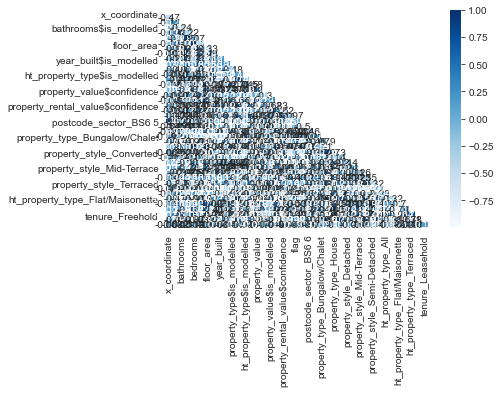

In [445]:
# mask out upper triangle
Var_Corr = OH_X.corr()
mask = np.zeros_like(Var_Corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# heatmap
sb.heatmap(Var_Corr.corr(), 
           cmap='Blues', 
           annot = True, 
           mask = mask)

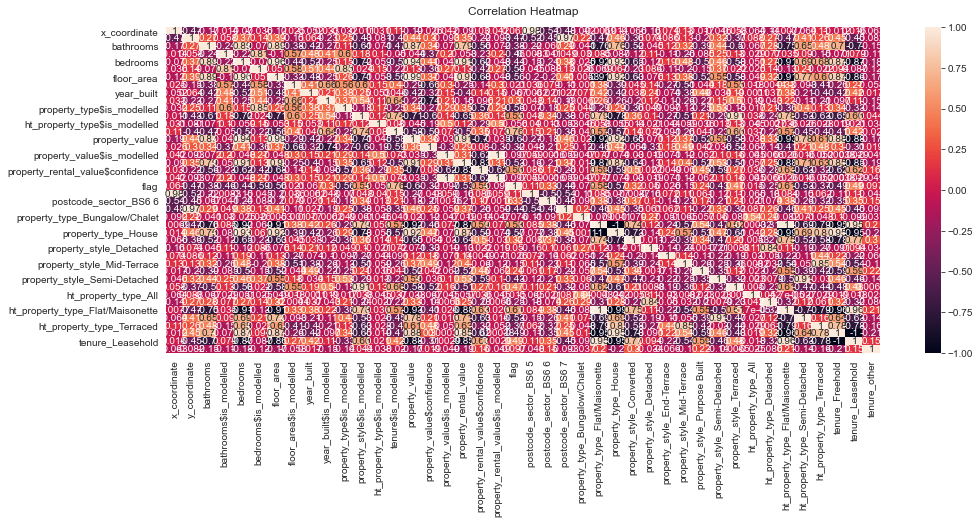

In [446]:
Var_Corr = OH_X.corr()
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it 
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(Var_Corr.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

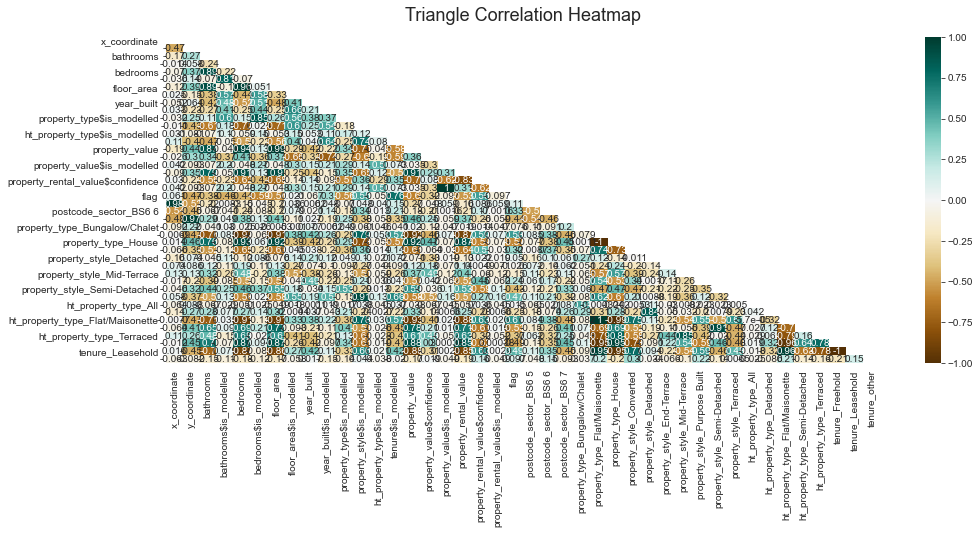

In [447]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(Var_Corr.corr(), dtype=np.bool))
heatmap = sns.heatmap(Var_Corr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [56]:
Var_Corr = OH_X.corr()
Var_Corr

x_coordinate  y_coordinate  bathrooms  \
x_coordinate                           1.000000     -0.347462  -0.099275   
y_coordinate                          -0.347462      1.000000   0.014185   
bathrooms                             -0.099275      0.014185   1.000000   
bathrooms$is_modelled                 -0.010310      0.028481  -0.140107   
bedrooms                              -0.023016      0.093498   0.537977   
bedrooms$is_modelled                  -0.018637      0.048578  -0.059785   
floor_area                            -0.077466      0.085685   0.533970   
floor_area$is_modelled                 0.027994     -0.020086  -0.109175   
year_built                            -0.029571      0.119018  -0.066003   
year_built$is_modelled                -0.001822     -0.078873  -0.074452   
property_type$is_modelled             -0.004676      0.089680  -0.009375   
property_style$is_modelled            -0.034705     -0.154238  -0.164372   
ht_property_type$is_modelled           0.011576     -0.020892  -0.009496   
tenure$is_modelled                     0.047518     -0.116869  -0.111623   
property_value                        -0.203099      0.131813   0.508956   
property_value$confidence             -0.009364      0.138395   0.075839   
property_value$is_modelled             0.019828     -0.032109  -0.039469   
property_rental_value                 -0.074624      0.071402   0.378446   
property_rental_value$confidence      -0.009805     -0.003033  -0.221999   
property_rental_value$is_modelled      0.019828     -0.032109  -0.039469   
flag                                   0.004697     -0.188473  -0.054249   
postcode_sector_BS6 5                  0.844863     -0.369182  -0.084553   
postcode_sector_BS6 6                 -0.485570     -0.363606   0.061856   
postcode_sector_BS6 7                 -0.370261      0.774314   0.022949   
property_type_Bungalow/Chalet         -0.032834      0.098290  -0.028331   
property_type_Flat/Maisonette         -0.060186     -0.232843  -0.324054   
property_type_House                    0.066340      0.213873   0.329003   
property_style_Converted              -0.054424     -0.134894  -0.162789   
property_style_Detached               -0.068253      0.057942   0.028909   
property_style_End-Terrace             0.025013      0.028140   0.016727   
property_style_Mid-Terrace             0.055294     -0.005694   0.052688   
property_style_Purpose Built          -0.030029     -0.045109  -0.069290   
property_style_Semi-Detached           0.016690      0.126612   0.127628   
property_style_Terraced                0.016520     -0.102849  -0.101427   
ht_property_type_All                  -0.024295      0.045902  -0.016819   
ht_property_type_Detached             -0.043483      0.111462   0.088296   
ht_property_type_Flat/Maisonette      -0.062066     -0.223653  -0.309967   
ht_property_type_Semi-Detached         0.013011      0.155434   0.239667   
ht_property_type_Terraced              0.075964      0.051590   0.085415   
tenure_Freehold                        0.019246      0.174148   0.237526   
tenure_Leasehold                      -0.015676     -0.173912  -0.234338   
tenure_other                          -0.024040     -0.004244  -0.024857   

                                   bathrooms$is_modelled  bedrooms  \
x_coordinate                                   -0.010310 -0.023016   
y_coordinate                                    0.028481  0.093498   
bathrooms                                      -0.140107  0.537977   
bathrooms$is_modelled                           1.000000 -0.121519   
bedrooms                                       -0.121519  1.000000   
bedrooms$is_modelled                            0.475374 -0.103771   
floor_area                                     -0.026402  0.696349   
floor_area$is_modelled                          0.263486 -0.194436   
year_built                                      0.216197 -0.208376   
year_built$is_modelled                          0.199153 -0.027240

In [57]:
Var_Corr.corr()[['flag']].sort_values(by='flag', ascending=False)

flag
flag                               1.000000
tenure$is_modelled                 0.756433
ht_property_type_Flat/Maisonette   0.605161
property_type_Flat/Maisonette      0.578743
property_rental_value$confidence   0.562947
property_style$is_modelled         0.550048
tenure_Leasehold                   0.490578
property_style_Terraced            0.472690
postcode_sector_BS6 6              0.332381
property_style_Converted           0.323608
year_built$is_modelled             0.301262
property_style_Purpose Built       0.238108
postcode_sector_BS6 5              0.114880
tenure_other                       0.096994
x_coordinate                       0.060629
property_style_Detached            0.050340
floor_area$is_modelled             0.021172
ht_property_type_All               0.014709
property_style_End-Terrace        -0.025605
ht_property_type$is_modelled      -0.055790
year_built                        -0.066803
property_type_Bungalow/Chalet     -0.076409
property_value$is_modelled        -0.097150
property_rental_value$is_modelled -0.097150
property_style_Mid-Terrace        -0.153163
ht_property_type_Detached         -0.250817
property_value$confidence         -0.318881
ht_property_type_Terraced         -0.367446
bathrooms                         -0.383852
property_style_Semi-Detached      -0.426351
postcode_sector_BS6 7             -0.441911
bedrooms                          -0.444191
bathrooms$is_modelled             -0.456309
y_coordinate                      -0.469386
tenure_Freehold                   -0.491101
property_rental_value             -0.526901
ht_property_type_Semi-Detached    -0.534473
floor_area                        -0.557521
property_type$is_modelled         -0.561750
property_type_House               -0.574585
bedrooms$is_modelled              -0.585980
property_value                    -0.599504

## Prepare Data for Modeling:

In [62]:
y = OH_X.flag
X = OH_X.drop('flag', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Feature Importance

[4.74567537e-02 5.09547192e-02 5.21317084e-03 6.04914549e-02
 1.24132771e-02 1.18458017e-01 3.54300484e-02 3.59558621e-03
 3.57086693e-02 1.16635094e-01 3.17509498e-04 2.05266585e-03
 0.00000000e+00 1.20535331e-01 3.87810928e-02 8.18219257e-02
 2.16002808e-05 6.12025509e-02 1.63444864e-01 4.84901051e-05
 1.58633786e-03 3.16666997e-03 1.87426273e-03 4.63880704e-04
 1.98809130e-03 2.44147008e-03 3.76810460e-03 1.33802367e-03
 3.20599898e-03 3.23888580e-03 3.99532266e-03 2.41921688e-03
 2.24385943e-03 5.41956320e-04 4.32919025e-04 1.21505752e-03
 1.70936046e-03 2.65604621e-03 1.99704595e-03 4.02082425e-03
 1.11384518e-03]


<BarContainer object of 41 artists>

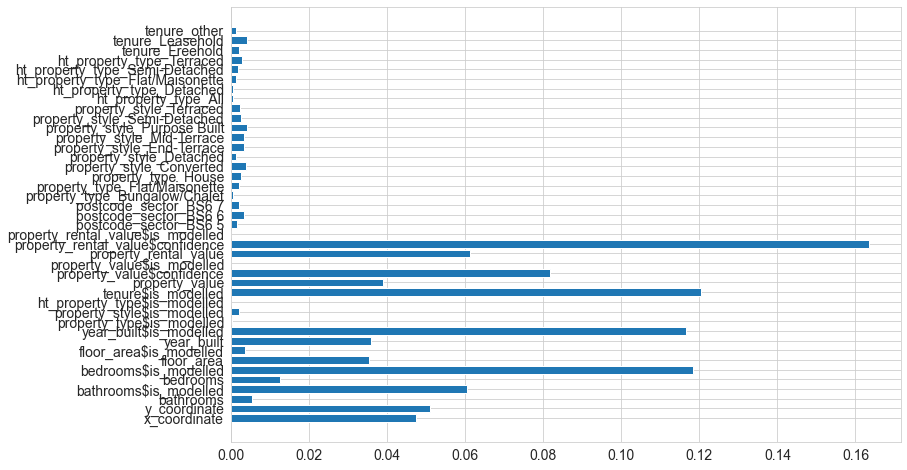

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt
cols = X_train.columns.to_numpy()
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
print(rf.feature_importances_)
plt.barh(cols, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

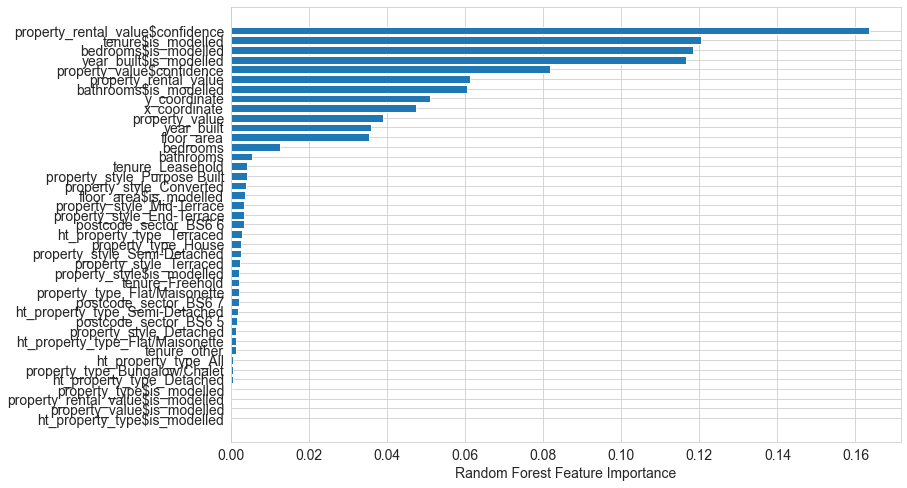

In [65]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(cols[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## ROC Curve Analysis:

In [66]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(),
               RandomForestClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

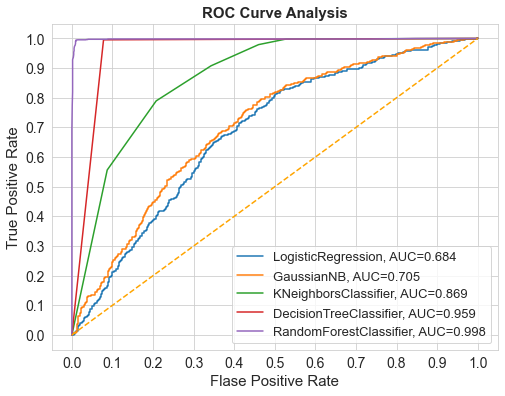

In [67]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## Calculate K fold:

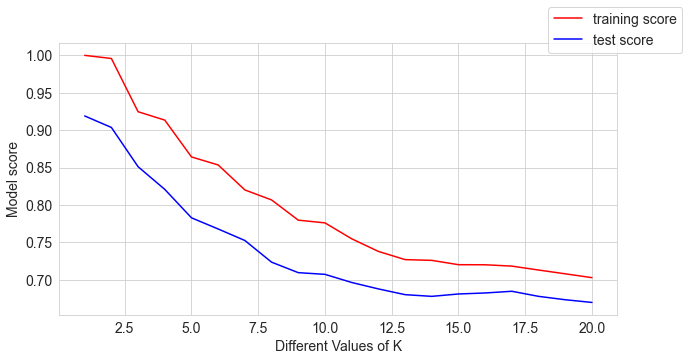

In [68]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [74]:
# Find best score for K
knn = KNeighborsClassifier(n_neighbors = 2)

#Fit the model
knn.fit(X_train,y_train)

#get the score
print('For K = 2 the Score =', knn.score(X_test,y_test))

For K = 2 the Score = 0.9035762788592123


In [75]:
X_trainI = X_train.copy()
y_trainI = y_train.copy()
X_testI = X_test.copy()
y_testI = y_test.copy()

In [77]:
X_train = X_trainI.values
y_train = y_trainI.values
X_test = X_testI.values
y_test = y_testI.values
#create an array of models
models = []
#models.append(("LR",LogisticRegression()))
#models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
#models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))


# Data frame for evaluation metrics
metrics = pd.DataFrame(index=['Accuracy','Average expected loss', 'Average bias', 'Average variance', 
                              'RMSE on train data', 'RMSE on test data', 'R2 Score'], 
                      columns=[#'LR','NB', 
                          'RF', 'SVC','Dtree',#'XGB',
                          'KNN'])

#measure the accuracy 
for name,model in models:
    kfold = KFold(n_splits= 10 #, random_state=22
                 )
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    #print(name, cv_result.max())
    # estimating the bias and variance
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train,
                                                            y_train, X_test,
                                                            y_test,
                                                            loss='mse',
                                                            num_rounds=50,
                                                            random_seed=20)
    # fit the model with the training data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    # predict the target on train and test data
    predict_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    # summary of the results
    # 4. Evaluate the model
    metrics.loc['Average expected loss',name] = round(avg_expected_loss*100,2)
    metrics.loc['Average bias',name] = round(avg_bias*100,2)
    metrics.loc['Average variance',name] = round(avg_var*100,2)
    metrics.loc['Accuracy',name] = round(cv_result.max()*100,2)
    
    # Root Mean Squared Error on train and test data (Perfect Model RMSE = 0)
    metrics.loc['RMSE on train data',name] = mean_squared_error(y_train, predict_train)**(0.5)
    metrics.loc['RMSE on test data',name] = mean_squared_error(y_test, y_pred)**(0.5)
    # R2 Score (Perfect Model R2 = 100)
    metrics.loc['R2 Score',name] = round(r2_score(y_test, y_pred, multioutput='variance_weighted')*100, 2)
    print('Done: ' + name)
metrics

Done: RF
Done: SVC
Done: Dtree
Done: KNN


RF       SVC     Dtree       KNN
Accuracy                  98.19     64.37     96.49     79.19
Average expected loss      3.48     36.99      6.46     24.12
Average bias               2.29     36.73      2.58     15.38
Average variance           1.19      0.26      3.88      8.74
RMSE on train data          0.0  0.619598       0.0  0.368584
RMSE on test data      0.144305   0.60964  0.196161  0.466147
R2 Score                  91.67    -48.67     84.61     13.08

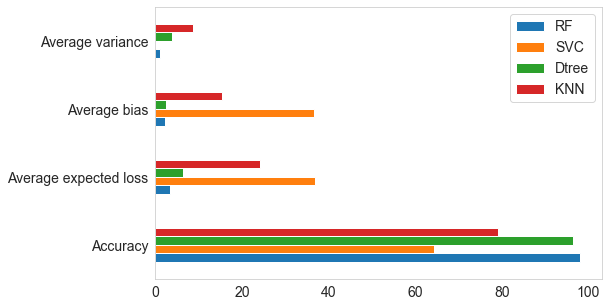

In [78]:
metrics_II = metrics.drop(['RMSE on train data', 'RMSE on test data', 'R2 Score'])
fig, ax = plt.subplots(figsize=(8,5))
metrics_II.plot(kind='barh', ax=ax)
plt.legend(loc=1)
ax.grid();

In [79]:
X = X_train.copy()
y = y_train.copy()

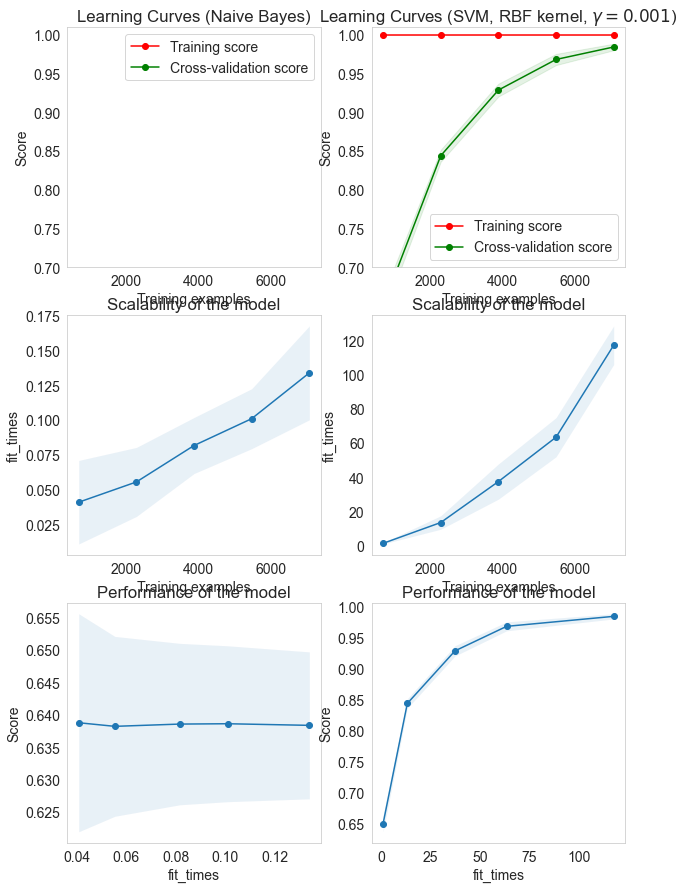

In [80]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

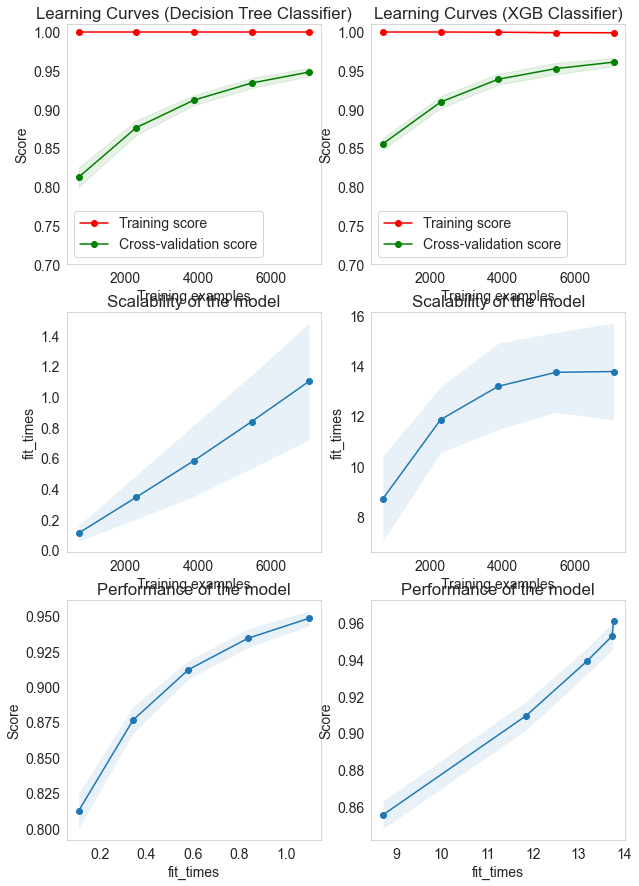

In [81]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Decision Tree Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (XGB Classifier)"
# XGB Classifier is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = xgb.XGBClassifier()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

## Scale the data:

In [ ]:
scaler = MinMaxScaler()
df_scaled = .copy()
df_model_scaled_t[['v2', 'v3', 'v5', 'v6', 'v7', 'v10', 'v13', 'v14', 'classLabel', 'v1_a',
       'v1_b', 'v4_l', 'v4_u', 'v4_y', 'v8_f', 'v8_t', 'v9_f', 'v9_t', 'v11_f',
       'v11_t', 'v12_g', 'v12_p', 'v12_s', 'v16_f', 'v16_t']] = scaler.fit_transform(df_model_scaled_t)


## hyperparameters for Decision Tree Classifier:

In [190]:
y = OH_X[['flag']]
X = OH_X.drop('flag', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [187]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [188]:
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

In [189]:
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [191]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30, ...]})

In [192]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 12
Best Number Of Components: 25

DecisionTreeClassifier(max_depth=12)


In [197]:
Best_Model= DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')

## Try the Model:

In [202]:
y = OH_X['flag'].values
X = OH_X.drop('flag', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [210]:
from sklearn import metrics

# Create Decision Tree classifer object
rfc = RandomForestClassifier()

# Train Decision Tree Classifer
Best_Model = rfc.fit(X_train,y_train)
 
#Predict the response for test dataset
y_pred = Best_Model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9782707107288365


In [213]:
y = OH_X[['flag']]
X = OH_X.drop('flag', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [214]:
# prepare for prediction:
y_test_h = Best_Model.predict(X_test)

y_test['y_test_h'] = y_test_h

#df_out = OH_X.merge(y_test, how = 'left', left_index = True, right_index = True)
df_out = pd.merge(X_test, y_test[['y_test_h']], how = 'left',  left_index = True, right_index = True)

print(df_out.shape)
df_out.head()

(3557, 42)


x_coordinate  y_coordinate  bathrooms  bathrooms$is_modelled  bedrooms  \
1      359182.0      174475.0        1.0                    1.0       2.0   
2      359231.0      174588.0        1.0                    1.0       2.0   
3      358634.0      176385.0        1.0                    0.0       2.0   
3      358634.0      176385.0        1.0                    0.0       2.0   
3      358634.0      176385.0        1.0                    0.0       2.0   

   bedrooms$is_modelled  floor_area  floor_area$is_modelled  year_built  \
1                   1.0        43.0                     1.0      1984.0   
2                   1.0        45.0                     1.0      2002.0   
3                   0.0        89.0                     0.0      1895.0   
3                   0.0        89.0                     0.0      1895.0   
3                   0.0        89.0                     0.0      1895.0   

   year_built$is_modelled  property_type$is_modelled  \
1                     1.0                        1.0   
2                     0.0                        0.0   
3                     1.0                        0.0   
3                     1.0                        0.0   
3                     1.0                        0.0   

   property_style$is_modelled  ht_property_type$is_modelled  \
1                         0.0                           0.0   
2                         1.0                           0.0   
3                         0.0                           0.0   
3                         0.0                           0.0   
3                         0.0                           0.0   

   tenure$is_modelled  property_value  property_value$confidence  \
1                 0.0       340297.44                   0.799835   
2                 0.0       256138.55                   0.935801   
3                 1.0       345417.00                   0.908000   
3                 1.0       345417.00                   0.908000   
3                 1.0       345417.00                   0.908000   

   property_value$is_modelled  property_rental_value  \
1                         1.0              4437.3580   
2                         1.0              3749.2751   
3                         0.0              1112.9900   
3                         0.0              1112.9900   
3                         0.0              1112.9900   

   property_rental_value$confidence  property_rental_value$is_modelled  \
1                           0.00000                                1.0   
2                           0.00000                                1.0   
3                           0.94048                                0.0   
3                           0.94048                                0.0   
3                           0.94048                                0.0   

   postcode_sector_BS6 5  postcode_sector_BS6 6  postcode_sector_BS6 7  \
1                    1.0                    0.0                    0.0   
2                    1.0                    0.0                    0.0   
3                    0.0                    0.0                    1.0   
3                    0.0                    0.0                    1.0   
3                    0.0                    0.0                    1.0   

   property_type_Bungalow/Chalet  property_type_Flat/Maisonette  \
1                            0.0                            1.0   
2                            0.0                            1.0   
3                            0.0                            0.0   
3                            0.0                            0.0   
3                            0.0                            0.0   

   property_type_House  property_style_Converted  property_style_Detached  \
1                  0.0                       0.0                      0.0   
2                  0.0                       0.0                      0.0   
3                  1.0                       0.0                      0.0   
3                  1.0    

## Save Best Model:

In [215]:
import _pickle as cPickle

with open(r"Outra_Model.pickle", "wb") as output_file:
    cPickle.dump(Best_Model, output_file)


# pickle_file will be closed at this point, preventing your from accessing it any further

with open(r"Outra_Model.pickle", "rb") as input_file:
    Outra_Model = cPickle.load(input_file)

## Predict Rent:

In [229]:
perc = 50.0
min_count =  int(((100-perc)/100)*df_upsampled.shape[0] + 1)
df_f1 = df_upsampled.dropna( axis=1, 
                thresh=min_count)
df_f1[['property_type', 'property_style', 'tenure']] = df_f1[['property_type', 'property_style', 'tenure']].fillna(df_f1[['property_type', 'property_style', 'tenure']].mode().iloc[0])
df_f1[['bathrooms', 'bedrooms', 'year_built']] = df_f1[['bathrooms', 'bedrooms', 'year_built']].fillna( df_f1[['bathrooms', 'bedrooms', 'year_built']].median()) 
for col in ('floor_area', 'property_value', 'property_value$confidence',
                         'property_rental_value', 'property_rental_value$confidence'):
    df_f1[col] = df_f1[col].fillna(df_f1[col].mean())
print(df_f1.isnull().sum())

In [235]:
# new data:
df_new = df[df['flag'].isnull()]#.reset_index()
df_new['flag'] = df_new['flag'].fillna(0)
# drop %50 or more if 'na' 
perc = 50.0
min_count =  int(((100-perc)/100)*df_upsampled.shape[0] + 1)
df_f1 = df_upsampled.dropna( axis=1, 
                thresh=min_count)
# filling missing data:
df_f1[['property_type', 'property_style', 'tenure']] = df_f1[['property_type', 'property_style', 'tenure']].fillna(df_f1[['property_type', 'property_style', 'tenure']].mode().iloc[0])
df_f1[['bathrooms', 'bedrooms', 'year_built']] = df_f1[['bathrooms', 'bedrooms', 'year_built']].fillna( df_f1[['bathrooms', 'bedrooms', 'year_built']].median()) 
for col in ('floor_area', 'property_value', 'property_value$confidence',
                         'property_rental_value', 'property_rental_value$confidence'):
    df_f1[col] = df_f1[col].fillna(df_f1[col].mean())       
# clean up classes:    
df_f1.tenure = df_f1.tenure.replace(['Feudal','Shared'],'other')
df_f1 = df_f1.drop(['prop_id', 'post_town'], axis=1)
# one hot encoder:
object_cols = df_f1.select_dtypes(include=['object']).columns
low_cardinality_cols = [col for col in object_cols if df_f1[col].nunique() < 15]
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) # Cannot use drop='first' with handle_unknown
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_f1[low_cardinality_cols]))
# One-hot encoding removed index; put it back
OH_cols.index = df_f1.index
# One-hot encoding removed columns' names; put it back
OH_cols.columns = OH_encoder.get_feature_names(low_cardinality_cols)
# Remove categorical columns (will replace with one-hot encoding)
num_X = df_f1.drop(object_cols, axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
# prepare for prediction:
y_n = OH_X[['flag']]
X_n = OH_X.drop('flag', axis=1)

In [238]:
#Predict the response for test dataset
y_pred = Outra_Model.predict(X_n)
y_n['y_test_h'] = y_pred

#df_out = OH_X.merge(y_test, how = 'left', left_index = True, right_index = True)
df_out = pd.merge(df, y_n[['y_test_h']], how = 'left',  left_index = True, right_index = True)

print(df_out.shape)
df_out.head()

# scale the data:
# std_slc = StandardScaler()

(19631, 38)


prop_id  x_coordinate  y_coordinate post_town postcode_sector  bathrooms  \
0   147676      357605.0      175370.0   BRISTOL           BS6 7        1.0   
1   152958      359244.0      175113.0   BRISTOL           BS6 5        1.0   
2   154711      357885.0      174968.0   BRISTOL           BS6 6        1.0   
3   155062      358435.0      174998.0   BRISTOL           BS6 7        1.0   
3   155062      358435.0      174998.0   BRISTOL           BS6 7        1.0   

   bathrooms$confidence  bathrooms$is_modelled  bedrooms  bedrooms$confidence  \
0              0.690607                   True       2.0             0.597546   
1              0.669888                   True       2.0             0.545742   
2              0.755115                   True       1.0             0.441697   
3              0.437527                   True       1.0             0.303969   
3              0.437527                   True       1.0             0.303969   

   bedrooms$is_modelled  floor_area  floor_area$confidence  \
0                  True        75.0               0.268520   
1                  True        77.0               0.498164   
2                  True        52.0               0.501172   
3                  True       172.0               0.444716   
3                  True       172.0               0.444716   

   floor_area$is_modelled  year_built  year_built$confidence  \
0                    True      1926.0               0.974469   
1                    True      1932.0               0.974275   
2                    True      1925.0               0.969434   
3                    True      1933.0               0.969446   
3                    True      1933.0               0.969446   

   year_built$is_modelled    property_type  property_type$confidence  \
0                    True  Flat/Maisonette                  0.966385   
1                    True  Flat/Maisonette                  0.980929   
2                    True  Flat/Maisonette                  0.985670   
3                    True  Flat/Maisonette                  0.978077   
3                    True  Flat/Maisonette                  0.978077   

   property_type$is_modelled property_style  property_style$confidence  \
0                       True       Terraced                   0.319002   
1                       True       Terraced                   0.327816   
2                       True      Converted                   0.378411   
3                       True  Semi-Detached                   0.657277   
3                       True  Semi-Detached                   0.657277   

   property_style$is_modelled ht_property_type  ht_property_type$confidence  \
0                        True  Flat/Maisonette                     0.579901   
1                        True  Flat/Maisonette                     0.763958   
2                        True  Flat/Maisonette                     0.854654   
3                        True  Flat/Maisonette                     0.658884   
3                        True  Flat/Maisonette                     0.658884   

   ht_property_type$is_modelled     tenure  tenure$confidence  \
0                          True  Leasehold           0.727775   
1                          True  Leasehold           0.880897   
2                          True  Leasehold           0.947736   
3                          True   Freehold           0.778489   
3                          True   Freehold           0.778489   

   tenure$is_modelled  property_value  property_value$confidence  \
0                True       378103.60                   0.800291   
1                True       377139.25                   0.661276   
2                True       322239.60                   0.841244   
3                True       367524.94                   0.602055   
3                True       367524.94                   0.602055   

   property_value$is_modelled  property_rental_value  \
0                        True              4364.6704   
1                 

## Save Results:

In [240]:
df_all = df_out.copy(deep=True)
df_all.to_csv('C:/Users/Admin/Documents/Outra/df_all.csv', index=False)